# Import the libraries

In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Case A: Turbojet without afterburner 

Defining a class for que 1 and que 2

In [38]:
class turbojetenginewithoutafterburner:
    def __init__(self,start_pressure_ratio,end_pressure_ratio,step_pressureratio,Ma):
        self.start_pressure_ratio=start_pressure_ratio
        self.end_pressure_ratio=end_pressure_ratio
        self.step_pressureratio=step_pressureratio
        self.Ma=Ma
    
    def dimensionlessthrust(self):
        self.Tc=(np.arange(self.start_pressure_ratio,self.end_pressure_ratio,self.step_pressureratio))**(1/3.5)
        self.x=1+0.2*self.Ma**2
        self.Dimensionless_thrust=self.Ma*(((self.x/(self.x-1))*(6/(self.x*self.Tc)-1)*(self.Tc-1)+(6/(self.x*self.Tc)))**0.5-1)
    
    def tsfc(self):
        self.tsfcaa=(6-self.Tc*(1+0.2*self.Ma**2))/(self.Dimensionless_thrust*150)
    
    def plotthrust(self):
        self.Pc=np.arange(self.start_pressure_ratio,self.end_pressure_ratio,self.step_pressureratio)
        plt.plot(self.Pc,self.Dimensionless_thrust)
        plt.xlabel('Pressure Ratio')
        plt.ylabel('Dimensionless Thrust')
        plt.title('Dimensionless Thrust vs Pressure Ratio')
    
    def plottsfc(self):
        plt.plot(self.tsfcaa,self.Dimensionless_thrust)
        plt.xlabel('Pressure Ratio')
        plt.ylabel('TSFC aa')
        plt.title('TSFC aa vs Pressure Ratio')
    
    def inletstatictempratio(self,start,end,step):
        self.start=start
        self.end=end
        self.step=step
        self.k=np.arange(self.start,self.end,self.step)
        self.ratioTc=(18)**(1/3.5)
        self.temp_ratio_Dimensionless_thrust=self.Ma*(((self.x/(self.x-1))*(6/(self.k*self.x*self.ratioTc)-1)*(self.ratioTc-1)+(6/(self.k*self.x*self.ratioTc)))**0.5-1)
    
    def inletstatictempratiotsfc(self):
        self.inletstatictsfcaa=(6-self.ratioTc*(1+0.2*self.Ma**2))/(self.temp_ratio_Dimensionless_thrust*150)
                
    def inletstatictempplotthrust(self):
        plt.plot(self.k,self.temp_ratio_Dimensionless_thrust)
        plt.xlabel('Static Temperature Ratio')
        plt.ylabel('Dimensionless Thrust')
        plt.title('Dimensionless Thrust vs Static Temperature Ratio')
        
    def inletstatictempplottsfc(self):
        plt.plot(self.k,self.inletstatictsfcaa)
        plt.xlabel('Static Temperature Ratio')
        plt.ylabel('TSFC aa')
        plt.title('TSFC aa vs Static Temperature Ratio')

# Question 1

In [39]:
#creating an engine object with turbojetenginewithoutafterburner class and providing pressure ratios as input parameters
engine=turbojetenginewithoutafterburner(5,26,2.5,0.75)

In [40]:
#use the dimensionlessthrust method on engine class to get the dimensionless thrust
engine.dimensionlessthrust()
#Get the dimensionless thrust for the engine
engine.Dimensionless_thrust

array([2.3687161 , 2.49141525, 2.5448249 , 2.5683668 , 2.57635601,
       2.57530491, 2.56860977, 2.55821319, 2.54530295])

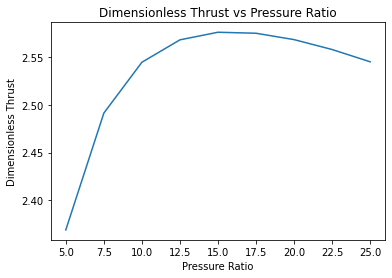

In [41]:
#Plot the dimensionless thrust
engine.plotthrust()

In [42]:
#use the tsfc method on engine object to get the tsfc
engine.tsfc()
engine.tsfcaa

array([0.0119277 , 0.01076118, 0.01009133, 0.0096318 , 0.00928517,
       0.00900784, 0.00877694, 0.00857908, 0.00840584])

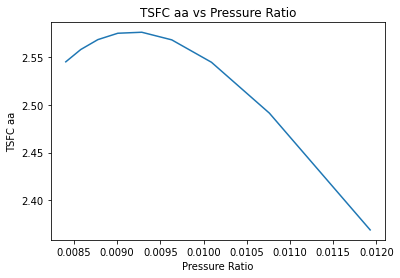

In [43]:
#plot the tsfc for tge engine
engine.plottsfc()

# Question 2

In [44]:
#Use the inletstatictempratio method on engine object
engine.inletstatictempratio(0.6,1.3,0.2)

In [45]:
#Get the dimensionless thrust at diferrent temperature ratio
engine.temp_ratio_Dimensionless_thrust

array([4.06449048, 3.19959096, 2.57434037, 2.08182255])

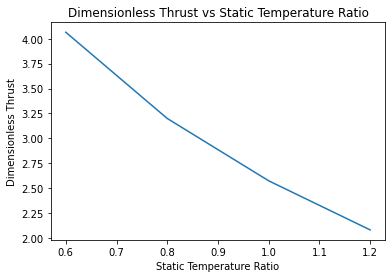

In [46]:
#plot the dimensionless thrust
engine.inletstatictempplotthrust()

In [47]:
#Use the inletstatictempratiotsfc 
engine.inletstatictempratiotsfc()

In [48]:
#Get the Tsfc at different temperature ratios
engine.inletstatictsfcaa

array([0.00567406, 0.00720785, 0.00895847, 0.01107787])

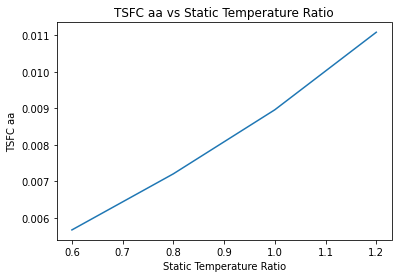

In [50]:
#Plot the Tsfc
engine.inletstatictempplottsfc()

# Case B: Turbofan with Fan exhausted, without afterburner

# Question 1

In [2]:
#Create a function which gets dimensionless thrust with Tau C and Tau fan as input parameters
def dimensionless_thrust(Tc,Tf):
    Ma=0.75
    x=1+0.2*Ma**2
    B=4
    return Ma*(abs(((6/(x*Tc))*(x*Tc*(1-(x/6)*(Tc-1+4*(Tf-1)))-1))/(x-1))**0.5-1)+4*Ma*(((x*Tf-1)/(x-1))**0.5-1)

In [3]:
#create a function which gets tsfc with Tau c and dimensionless thrust as input
def tsfcfunc(Tc,dt):
    Ma=0.75
    x=1+0.2*Ma**2
    tsfcaa=(6-x*Tc)*(1/150)/dt
    return tsfcaa

In [26]:
#Create a class for 
class turbofanwithfanexhausted:
    def __init__(self,fan_pressure_start,fan_pressure_end,compressor_pressure_start,compressor_pressre_end):
        self.fan_pressure_start=fan_pressure_start
        self.fan_pressure_end=fan_pressure_end
        self.compressor_pressure_start=compressor_pressure_start
        self.compressor_pressre_end=compressor_pressre_end
        self.Pf=np.linspace(self.fan_pressure_start,self.fan_pressure_end,1000)
        self.Pc=np.linspace(self.compressor_pressure_start,self.compressor_pressre_end,1000)
        self.Tf=(np.linspace(self.fan_pressure_start,self.fan_pressure_end,1000))**(1/3.5)
        self.Tc=(np.linspace(self.compressor_pressure_start,self.compressor_pressre_end,1000))**(1/3.5)
        self.X_plot,self.Y_plot=np.meshgrid(self.Pc,self.Pf)
    def thrust(self):
        self.X, self.Y =np.meshgrid(self.Tc,self.Tf)
        self.Z_thrust=dimensionless_thrust(self.X,self.Y)
    def tsfc(self):
        self.Z_tsfc=tsfcfunc(self.X,self.Z_thrust)
    def wireplotthrust(self):
        plt.figure(figsize=(14, 9))
        ax = plt.axes(projection="3d")
        ax.plot_wireframe(self.X_plot, self.Y_plot, self.Z_thrust, color='green')
        ax.set_xlabel('Compressor pressure ratio.')
        ax.set_ylabel('Fan pressure ratio.')
        ax.set_zlabel('Dimensionless Thrust')
        plt.show()
    def contourplotthrust(self):
        # Import libraries 
        from mpl_toolkits import mplot3d 
        # Creating figyre 
        fig = plt.figure(figsize =(14, 9)) 
        ax = plt.axes(projection ='3d') 
        # Creating plot 
        ax.plot_surface(self.X_plot, self.Y_plot, self.Z_thrust)
        ax.set_xlabel('Compressor pressure ratio.')
        ax.set_ylabel('Fan pressure ratio.')
        ax.set_zlabel('Dimensionless Thrust')
        # show plot 
        plt.show() 
    def wireplottsfc(self):
        plt.figure(figsize=(14, 9))
        ax = plt.axes(projection="3d")
        ax.plot_wireframe(self.X_plot, self.Y_plot, self.Z_tsfc, color='green')
        ax.set_zlim(0, 0.015) 
        ax.set_xlabel('Compressor pressure ratio.')
        ax.set_ylabel('Fan pressure ratio.')
        ax.set_zlabel('TSFC aa.')
        plt.show()
    def contourplottsfc(self):    
        # Import libraries 
        from mpl_toolkits import mplot3d 
        # Creating figyre 
        fig = plt.figure(figsize =(14, 9)) 
        ax = plt.axes(projection ='3d') 
        # Creating plot 
        ax.plot_surface(self.X_plot, self.Y_plot, self.Z_tsfc)
        ax.set_zlim(0, 0.015) 
        ax.set_xlabel('Compressor pressure ratio.')
        ax.set_ylabel('Fan pressure ratio.')
        ax.set_zlabel('TSFC aa.')
         
        # show plot 
        plt.show() 

In [29]:
#Create a fan engine object
fanengine=turbofanwithfanexhausted(1.25,4,0.1,30)

In [30]:
#Apply the thrust and tsfc methods 
fanengine.thrust()
fanengine.tsfc()

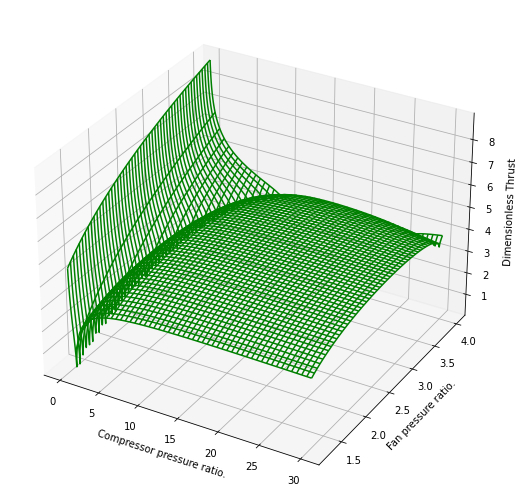

In [31]:
#Plot the 3D plot of dimensionless thrust
fanengine.wireplotthrust()

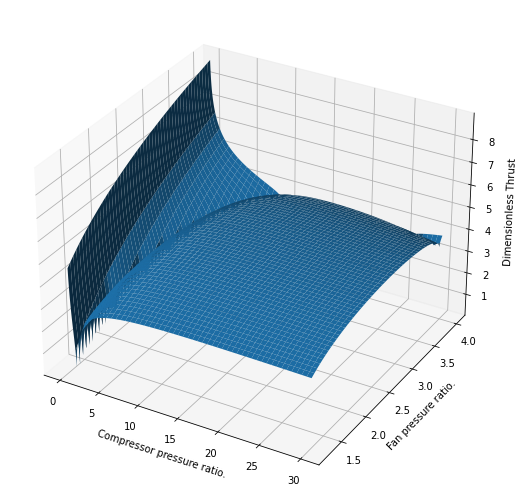

In [32]:
fanengine.contourplotthrust()

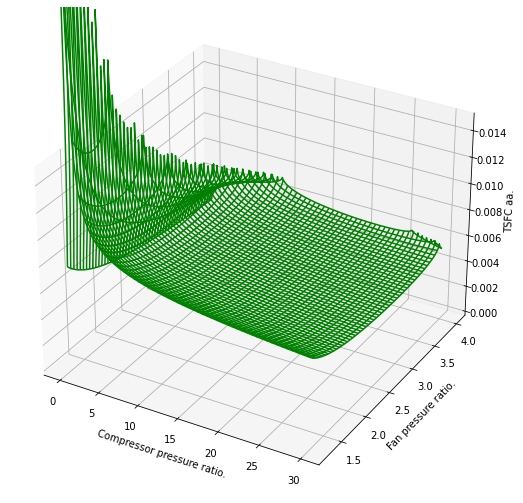

In [33]:
#Plot the 3D plot of TSFC
fanengine.wireplottsfc()

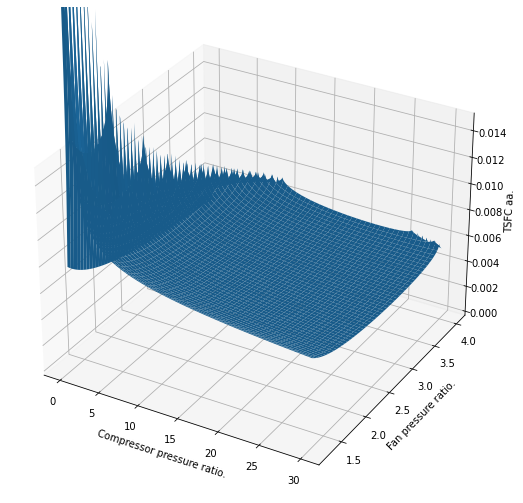

In [34]:
fanengine.contourplottsfc()